In [48]:
import numpy as np
six_paramter_fit_dict_nominal = {'H2O2 + OH <=> H2O + HO2': {'A': 4.64e-06,
  'n': 5.605491008,
  'Ea': -5440.266692,
  'c': 126875776.1,
  'd': 0.000441194,
  'f': -5.35e-13},
 '2 HO2 <=> H2O2 + O2': {'A': 13000.0,
  'n': 1.997152351,
  'Ea': -3628.04407,
  'c': 93390973.44,
  'd': -0.000732521,
  'f': 8.2e-12},
 'HO2 + OH <=> H2O + O2': {'A': 1.41e+18,
  'n': -2.05344973,
  'Ea': -232.0064051,
  'c': 15243859.12,
  'd': -0.001187694,
  'f': 8.01e-12},
 '2 OH <=> H2O + O': {'A': 354.5770856,
  'n': 2.938741717,
  'Ea': -1836.492972,
  'c': 12010735.18,
  'd': -4.87e-05,
  'f': 1.22e-12},
 'CH3 + HO2 <=> CH4 + O2': {'A': 3190.0,
  'n': 2.670857,
  'Ea': -4080.73,
  'c': 0.0,
  'd': 0.0,
  'f': 0.0},
 'CH3 + HO2 <=> CH3O + OH': {'A': 838000000000.0,
  'n': 0.29,
  'Ea': -785.45,
  'c': 0.0,
  'd': 0.0,
  'f': 0.0}}

In [49]:
def calculate_six_parameter_fit(reaction,dictonary,temperature):
    #finish editing this 
    #calc Ea,c,d,F seprately 
    A = dictonary[reaction]['A']
    n = dictonary[reaction]['n']
    Ea_temp = dictonary[reaction]['Ea']/(1.987*temperature)
    c_temp = dictonary[reaction]['c']/((1.987*temperature)**3)
    d_temp = dictonary[reaction]['d']*(1.987*temperature)
    f_temp = dictonary[reaction]['f']* ((1.987*temperature)**3)
            

    k = A*(temperature**n)*np.exp(-Ea_temp-c_temp-d_temp-f_temp)
    return k 
def loop_over_six_parameter_fit(T_min, T_max, reaction,dictonary):
    k_six_parameter_fit = []
    Temperature = []
    for temp in np.arange(T_min,T_max):
        Temperature.append(temp)
        k_six_parameter_fit.append(calculate_six_parameter_fit(reaction,dictonary,temp))
    return k_six_parameter_fit

In [50]:
import cantera as ct
gas = ct.Solution('FFCM1_custom_cheb_extra_zeros_new.cti')

In [51]:
def calculate_cantera_rc(T_min,T_max,reaction):
    reaction_number = gas.reaction_equations().index(reaction)
    k_chevy = []
    Temperature=[]
    for temp in np.arange(T_min,T_max):
        Temperature.append(temp)
        gas.TPX = temp,101325,{'Ar':1}
        k_chevy.append(gas.forward_rate_constants[reaction_number]*1000)
    return k_chevy,Temperature

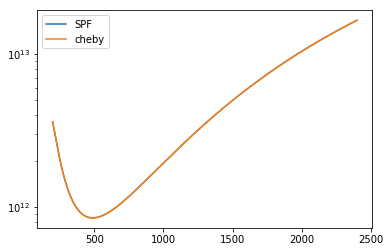

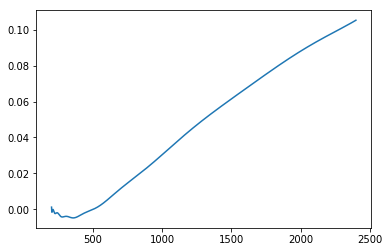

In [52]:
import matplotlib.pyplot as plt
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'H2O2 + OH <=> H2O + HO2',six_paramter_fit_dict_nominal)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'H2O2 + OH <=> H2O + HO2')
plt.semilogy(Temperature,k_six_parameter_fit,label='SPF')
plt.semilogy(Temperature,k_chevy,label='cheby')
plt.legend()
percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

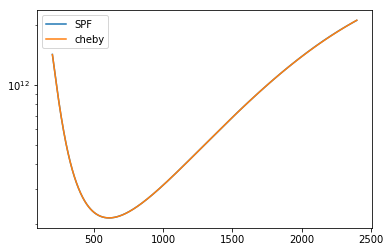

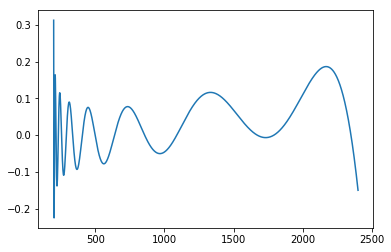

In [53]:
import matplotlib.pyplot as plt
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'2 HO2 <=> H2O2 + O2',six_paramter_fit_dict_nominal)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'2 HO2 <=> H2O2 + O2')
plt.semilogy(Temperature,k_six_parameter_fit,label='SPF')
plt.semilogy(Temperature,k_chevy,label='cheby')
plt.legend()
percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

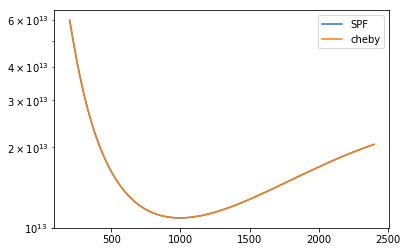

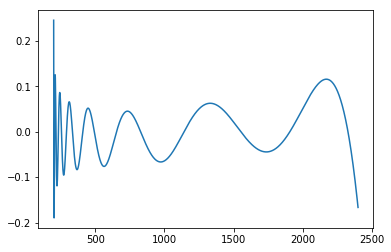

In [54]:
import matplotlib.pyplot as plt
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'HO2 + OH <=> H2O + O2',six_paramter_fit_dict_nominal)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'HO2 + OH <=> H2O + O2')
plt.semilogy(Temperature,k_six_parameter_fit,label='SPF')
plt.semilogy(Temperature,k_chevy,label='cheby')
plt.legend()
percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

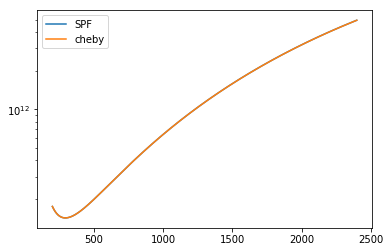

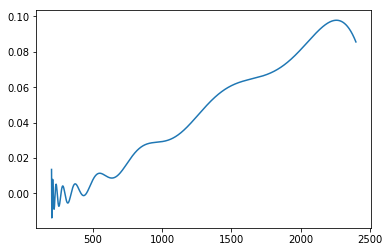

In [55]:
import matplotlib.pyplot as plt
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'2 OH <=> H2O + O',six_paramter_fit_dict_nominal)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'2 OH <=> H2O + O')
plt.semilogy(Temperature,k_six_parameter_fit,label='SPF')
plt.semilogy(Temperature,k_chevy,label='cheby')
plt.legend()
percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

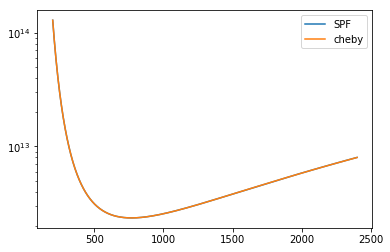

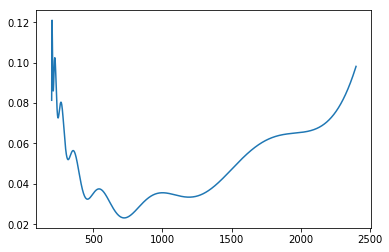

In [56]:
import matplotlib.pyplot as plt
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'CH3 + HO2 <=> CH4 + O2',six_paramter_fit_dict_nominal)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'CH3 + HO2 <=> CH4 + O2')
plt.semilogy(Temperature,k_six_parameter_fit,label='SPF')
plt.semilogy(Temperature,k_chevy,label='cheby')
plt.legend()
percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

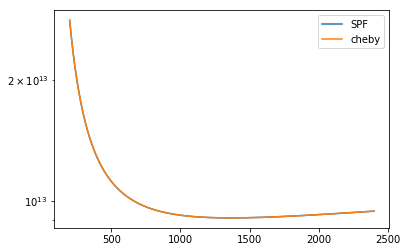

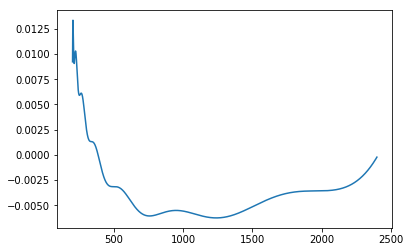

In [57]:
import matplotlib.pyplot as plt
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'CH3 + HO2 <=> CH3O + OH',six_paramter_fit_dict_nominal)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'CH3 + HO2 <=> CH3O + OH')
plt.semilogy(Temperature,k_six_parameter_fit,label='SPF')
plt.semilogy(Temperature,k_chevy,label='cheby')
plt.legend()
percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import copy 
import scipy.optimize as spcf
def calculate_six_parameter_fit(reaction,dictonary,temperature):
    #finish editing this 
    #calc Ea,c,d,F seprately 
    A = dictonary[reaction]['A']
    n = dictonary[reaction]['n']
    Ea_temp = dictonary[reaction]['Ea']/(1.987*temperature)
    c_temp = dictonary[reaction]['c']/((1.987*temperature)**3)
    d_temp = dictonary[reaction]['d']*(1.987*temperature)
    f_temp = dictonary[reaction]['f']* ((1.987*temperature)**3)
            

    k = A*(temperature**n)*np.exp(-Ea_temp-c_temp-d_temp-f_temp)
    return k 

def calculate_list_of_k(T_initial,T_final,reaction,dictonary):
    temperature = np.arange(T_initial,T_final)
    k_list = []
    for temp in temperature:
        k_list.append(calculate_six_parameter_fit(reaction,dictonary,temp))
    return temperature,k_list
        
    
def first_cheby_poly(x, n):
    '''Generate n-th order Chebyshev ploynominals of first kind.'''
    if n == 0: return 1
    elif n == 1: return x
    result = 2. * x * first_cheby_poly(x, 1) - first_cheby_poly(x, 0)
    m = 0
    while n - m > 2:
        result = 2. * x * result - first_cheby_poly(x, m+1)
        m += 1
    return result

def reduced_T( T, T_min, T_max):
    '''Calculate the reduced temperature.'''
    T = np.array(T)
    T_tilde = 2. * T ** (-1.0) - T_min ** (-1.0) - T_max ** (-1.0)
    T_tilde /= (T_max ** (-1.0) - T_min ** (-1.0))
    return T_tilde
    
def calc_polynomial(T,alpha):
    #calculate rate constants helper function
    T_reduced_list = reduced_T(T,200,2400)
    
    values = np.polynomial.chebyshev.chebval(T_reduced_list,alpha)

    return values



def fit_cheby_poly_1d(n_T, k, T_ls):
    #T needs to be a lsit 
    '''Fit the Chebyshev polynominals to rate constants.
       Input rate constants vector k should be arranged based on pressure.'''
    cheb_mat = np.zeros((len(k), n_T))
    for m, T in enumerate(T_ls):
        T_min = T_ls[0]
        T_max = T_ls[-1]
        for i in range(n_T):
            T_tilde = reduced_T(T, T_min, T_max)
            T_cheb = first_cheby_poly(T_tilde, i)

            cheb_mat[m,i] =  T_cheb
            #log_k = np.log10(np.array(k))

            
    coef,b,c,d = np.linalg.lstsq(cheb_mat,k,rcond=-1)
    
    return coef

def fit_cheby_k_from_six_parameter_fit(T_min,
                                       T_max,
                                       reaction,
                                       dictonary,
                                       number_coefficients):
    k_six_parameter_fit = []
    Temperature = []
    for temp in np.arange(T_min,T_max):
        Temperature.append(temp)
        k_six_parameter_fit.append(calculate_six_parameter_fit(reaction,dictonary,temp))
    
    coef = fit_cheby_poly_1d(number_coefficients,np.log10(np.array(k_six_parameter_fit)),Temperature)
    k_chevy = calc_polynomial(Temperature,coef)
    
    #plt.semilogy(Temperature,k_six_parameter_fit)
   # plt.semilogy(Temperature,k_chevy)
    #check to make sure that these things match, and that the
    #coefficients we chose does not overfit
    return coef,k_chevy
 
def fit_cheby_k_from_six_parameter_fit_ln(T_min,
                                       T_max,
                                       reaction,
                                       dictonary,
                                       number_coefficients):
    k_six_parameter_fit = []
    Temperature = []
    for temp in np.arange(T_min,T_max):
        Temperature.append(temp)
        k_six_parameter_fit.append(calculate_six_parameter_fit(reaction,dictonary,temp))
    
    coef = fit_cheby_poly_1d(number_coefficients,np.log(np.array(k_six_parameter_fit)),Temperature)
    k_chevy = calc_polynomial(Temperature,coef)
    
    plt.semilogy(Temperature,k_six_parameter_fit)
    plt.semilogy(Temperature,np.exp(k_chevy))
    #check to make sure that these things match, and that the
    #coefficients we chose does not overfit
    return coef,k_chevy
            

        
def find_new_alpha(xdata, ydata, alphas, alpha_index_to_recompute):
    def f(xdata, new_alpha):
        ydata = []
        for x in xdata:
            value = 0.0
            for alpha_index, alpha in enumerate(alphas):
                if alpha_index == alpha_index_to_recompute:
                    alpha = new_alpha
                term = first_cheby_poly(x, alpha_index)
                value += term * alpha
            ydata.append(value)
        return ydata
    
    popt, pcov = spcf.curve_fit(f, xdata, ydata)
    return popt, pcov
    
    
def find_alpha_coefficients_sens(original_alphas,new_alphas,dk):
    change_in_coefficients = np.array(new_alphas) - np.array(original_alphas)
    sensitivity = np.true_divide(change_in_coefficients,dk)
    return sensitivity

In [21]:
coef,k_chevy = fit_cheby_k_from_six_parameter_fit(200,
                                       2400,
                                       'H2O2 + OH <=> H2O + HO2',
                                       six_paramter_fit_dict_nominal,
                                       15)
coef.reshape(15,1)

array([[ 1.23749980e+01],
       [ 9.42419423e-02],
       [ 4.35610090e-01],
       [ 2.08911691e-01],
       [ 6.67018201e-02],
       [ 2.48010897e-02],
       [ 9.38557688e-03],
       [ 3.54809096e-03],
       [ 1.31696369e-03],
       [ 4.71143620e-04],
       [ 1.56728243e-04],
       [ 4.65345224e-05],
       [ 9.11003915e-06],
       [ 9.26935497e-07],
       [-3.58475559e-06]])

In [28]:
coef,k_chevy = fit_cheby_k_from_six_parameter_fit(200,
                                       2400,
                                       '2 HO2 <=> H2O2 + O2',
                                       six_paramter_fit_dict_nominal,
                                       15)
zeros = np.zeros((15,1))
np.hstack((coef.reshape(15,1),zeros)) 

array([[ 1.18000081e+01,  0.00000000e+00],
       [-1.51961517e-01,  0.00000000e+00],
       [ 3.50477029e-01,  0.00000000e+00],
       [ 2.04711903e-01,  0.00000000e+00],
       [ 8.00866373e-02,  0.00000000e+00],
       [ 3.28607315e-02,  0.00000000e+00],
       [ 1.21048651e-02,  0.00000000e+00],
       [ 3.41517233e-03,  0.00000000e+00],
       [-8.79130942e-05,  0.00000000e+00],
       [-1.05212232e-03,  0.00000000e+00],
       [-1.32852979e-03,  0.00000000e+00],
       [-9.46447846e-04,  0.00000000e+00],
       [-9.22852331e-04,  0.00000000e+00],
       [-3.19136713e-04,  0.00000000e+00],
       [-7.24040560e-04,  0.00000000e+00]])

In [47]:
coef,k_chevy = fit_cheby_k_from_six_parameter_fit(200,
                                       2400,
                                       '2 OH <=> H2O + O',
                                       six_paramter_fit_dict_nominal,
                                       17)
zeros = np.zeros((17,1))
np.hstack((coef.reshape(17,1),zeros))

array([[ 1.15159256e+01,  0.00000000e+00],
       [ 5.48268239e-01,  0.00000000e+00],
       [ 3.81867808e-01,  0.00000000e+00],
       [ 1.46598300e-01,  0.00000000e+00],
       [ 5.84505822e-02,  0.00000000e+00],
       [ 2.46903290e-02,  0.00000000e+00],
       [ 1.05728878e-02,  0.00000000e+00],
       [ 4.48793826e-03,  0.00000000e+00],
       [ 1.83830261e-03,  0.00000000e+00],
       [ 7.00826459e-04,  0.00000000e+00],
       [ 2.20916842e-04,  0.00000000e+00],
       [ 4.01661927e-05,  0.00000000e+00],
       [-2.94069145e-05,  0.00000000e+00],
       [-3.38379972e-05,  0.00000000e+00],
       [-4.19278126e-05,  0.00000000e+00],
       [-1.47584972e-05,  0.00000000e+00],
       [-3.71519396e-05,  0.00000000e+00]])

In [ ]:
'2 OH <=> H2O + O'